# Modul 2040.2 Bildsensorik & Bildverarbeitung
## Digitale Bildverarbeitung mit Python - Filteroperationen

### Stephan Nebiker, 15.05.2019

In dieser Übung soll die Anwendung von Filteroperationen auf Grauwertbildern mit Hilfe von scitkit-image in Python erarbeitet werden. Um das Verständnis des Ablaufs bei der Anwendung einer Filteroperation auf ein Bild zu vertiefen, werden Sie mithilfe von scikit-image und Python eine einfache Filteroperation implementieren und an Grauwertbildern testen. Zudem werden Sie verschiedene vordefinierte Filteroperationen von scikit-image auf Grauwertbilder anwenden. Diese Übung soll Ihnen weitere Anwendungsbereiche von Python in der digitalen Bildverarbeitung zeigen.

Am Schluss dieser Übung sollten Sie:
• Verschiedene Filteroperationen in Python auf Bilder anwenden können
• Eine einfache Filteroperation in Python selbst implementieren können


# Übung Filteroperationen - Teil 1: Implementierung Mittelbildungsfilter

Im ersten Übungsteil werden Sie einen Mittelungsfilter in Python implementieren. Die Grundlagen zum Aufbau eines Faltungsfilters und zur Berechnung eines Mittelwertfilters finden Sie in den Vorlesungsunterlagen (BSc_DBV_3040.2e_5_Filteroperationen.pdf).

In [1]:
# Laden der erforderlichen Pakete
from skimage import data
from skimage import io
from skimage import util
from skimage import filters
import numpy as np
import matplotlib.pyplot as plt


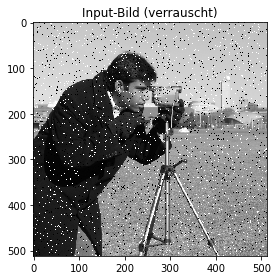

In [2]:
# Bild laden und verrauschen
# input_image = util.random_noise(data.camera())
input_image = util.random_noise(data.camera(),'s&p') #für Salt & Pepper noise

# Resultat beschriften und darstellen
plt.figure()
plt.title('Input-Bild (verrauscht)')

io.imshow(input_image)
io.show()

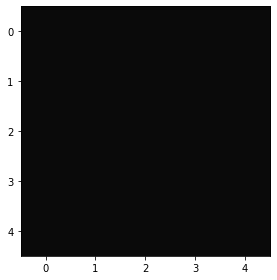

In [16]:
# Eigenes Mittelbildungsfilter definieren

# Beispiel 1: 'handgefertigtes' 5x5 Filter
#myavgf = 1/XXXX**np.array([[1, 1, 1, 1, 1],....])
# TODO

# Beispiel 2: 7 x 7 Filter; Filterdefinition mittels np.ones()
# TODO
filter_dim = 5 
myavgf = 1/(filter_dim**2)**np.ones((filter_dim,filter_dim))

io.imshow(myavgf)

    



In [57]:
# Breite und Höhe des Bildes und des Filterelements bestimmen
print(input_image.shape)

print(myavgf.shape)



# Breite und Höhe des Filterelements bestimmen
# TODO

# Offsets des Zentralelements des Filters bestimmen
mitte=int((myavgf.shape[0]+1)/2)
print(mitte)
type(mitte)





(512, 512)
(5, 5)
3


int

In [39]:
# Breite des Randes bestimmen, der mit dem Filter
# nicht berechnet werden kann
# TODO
rand=myavgf.shape[0]//2
print(rand)

2


(512, 512)


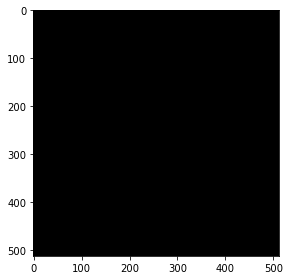

In [85]:
# Ausgabebild mit den Dimensionen des Inputsbilds definieren
# Tipp: verwenden Sie die Funktion np.zeros
bild2=np.zeros((input_image.shape[0],input_image.shape[1]))
io.imshow(bild2)
print(bild2.shape)



<function skimage.io._io.show()>

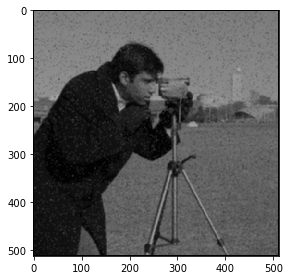

In [86]:
# Filter anwenden
# Zeilen- und spaltenweise Berechnung und Zuweisung

# Iterate for each input pixel ...



for i_im in range(rand,input_image.shape[0]-rand-1):
    for j_im in range(rand,input_image.shape[1]-rand-1):
        f_val=0
        for i_f in range(0,int(filter_dim)-1):
            for j_f in range(0,int(filter_dim)-1):
                f_val += input_image[i_im-mitte+i_f,j_im-mitte+j_f]*myavgf[i_f,j_f]

        bild2[i_im,j_im]=f_val

io.imshow(bild2)
io.show







In [66]:
# Ausgabebild darstellen
# TODO
print(myavgf.shape[0]-1)

4


In [74]:
# Ausgabebild speichern
# TODO
for k in range(0,myavgf.shape[0]-1):
    print(k)

0
1
2
3


## Zum Vergleich: Verwendung eines Mittelwertfilters aus dem SciPy-Paket

Hinweis: *scikit-image* enthält keinen Mittelwertfilter, sondern nur 'komplexere' Filtertypen

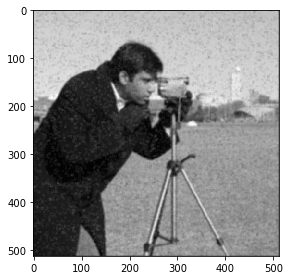

In [88]:
# Tipp: Studieren sie die Dokumentation zum unten verwendeten ndimage.uniform_filter.
# Interessant sind die verschiedenen Optionen zur Randbehandlunng

from scipy import ndimage

output_image =  ndimage.uniform_filter(input_image,size=filter_dim,mode="constant")

io.imshow(output_image)
io.show()